### 求微分方程数值解

$$
y' = \frac{1}{x^2+1} - 2y^2 , y(0) = 0
$$

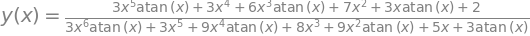

In [ ]:
import sympy as sp
sp.init_printing()
x = sp.symbols('x')
y = sp.symbols('y', cls=sp.Function)
eq = sp.Eq(y(x).diff(x, 1) - (1 / (x**2 + 1)) + 2 * y(x)**2, 0)
sol = sp.dsolve(eq)
display(sol)

[[0.        ]
 [0.09900996]
 [0.19230775]
 [0.2752294 ]
 [0.34482762]
 [0.40000004]
 [0.44117651]
 [0.46979872]
 [0.48780495]
 [0.49723764]]


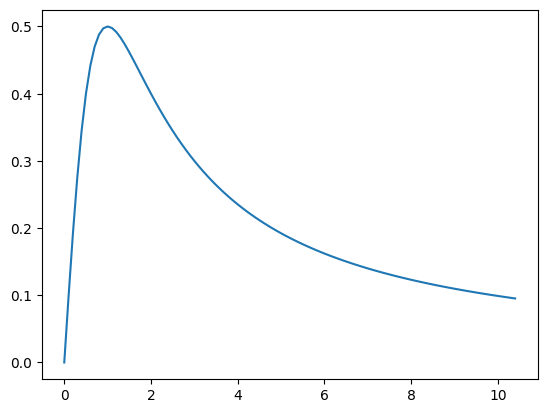

In [ ]:
import matplotlib.pyplot as plt
import scipy.integrate as spi
import numpy as np
def dy(y, x): return 1/(1+x**2)-2*y**2  # 定义y'


x = np.arange(0, 10.5, 0.1)
sol = spi.odeint(dy, 0, x)
print(sol[:10])
plt.plot(x, sol)
plt.show()

求不可积函数
$$
y'(x) = sin t^2, y(0) = 1
$$

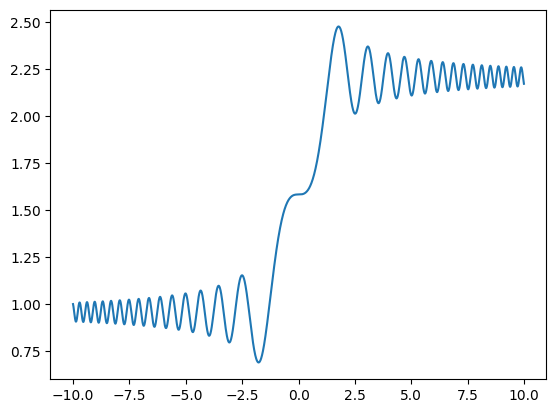

In [ ]:
def dy_dt(y, t):
    return np.sin(t**2)


y0 = [1]
t = np.arange(-10, 10, 0.01)
y = spi.odeint(dy_dt, y0, t)
plt.plot(t, y)
plt.show()

解高阶微分方程的数值解 
$$
y′′−20(1−y2)y′+y=0,y(0)=0,y′(0)=2
$$
降阶， 令u = y' 则 u' = y''  
$$
\begin{cases}
u' = 20(1-y^2)u - y\\
y' = u \\
y(0) = 0, u(0) = 2 \\
\end{cases}

odeint是通过把二阶微分转化为一个方程组的形式求解高阶方程的

In [ ]:
import numpy as np


def fvdp(y, x):
    '''
    要把y看出一个向量，y = [dy0,dy1,dy2,...]分别表示y的n阶导，那么
    y[0]就是需要求解的函数，y[1]表示一阶导，y[2]表示二阶导，以此类推
    '''
    dy1 = y[1]      # y[1]=dy/dt，一阶导                     y[0]表示原函数
    dy2 = 20*(1-y[0]**2) * y[1] - y[0]                    # y[1]表示一阶微分
    # y[0]是最初始，也就是需要求解的函数
    # 注意返回的顺序是[一阶导， 二阶导]，这就形成了一阶微分方程组
    return [dy1, dy2]

求解的是一个二阶微分方程，所以输入的时候同时输入原函数y和微分y'   \
y[0]表示原函数， y[1]表示一阶微分  \
dy1表示一阶微分， dy2表示的是二阶微分  \
可以发现，dy1和y[1]表示的是同一个东西  \
把y''分离变量分离出来：  \
$ dy2=20*(1-y[0]**2)*y[1]-y[0] $ 

y:
[0.         0.02213973 0.04917542 0.08217383 0.12241129 0.17139008
 0.23083061 0.30261249 0.38862014 0.49043034 0.6087762  0.7427756
 0.8890802  1.041387   1.19095297 1.32843735 1.44644047 1.54133536
 1.61342302 1.6657038  1.70228635 1.72720565 1.74383888 1.7547616
 1.76182797]
y':
[ 2.          2.44261521  2.98225626  3.63866651  4.43386984  5.39064944
  6.52902659  7.85925963  9.36943546 11.00614061 12.64985337 14.09520735
 15.05991697 15.25250139 14.50038395 12.8698378  10.67018007  8.3161543
  6.15422899  4.37240537  3.01227868  2.02805197  1.34134997  0.87382356
  0.56063686]


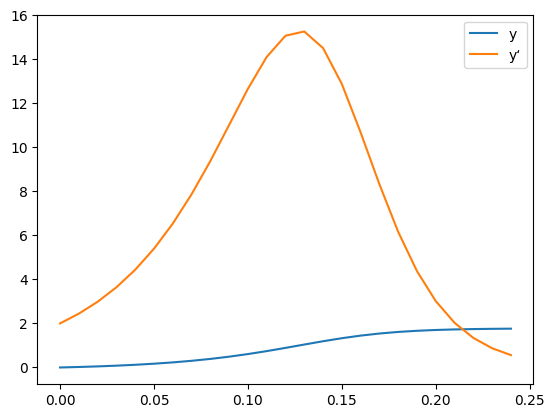

In [ ]:
def solve_second_order_ode():
    '''
    求解二阶ODE
    '''
    x = np.arange(0, 0.25, 0.01)  # 给x规定范围
    y0 = [0.0, 2.0]  # 初值条件
    # 初值[3.0, -5.0]表示y(0)=3,y'(0)=-5
    # 返回y，其中y[:,0]是y[0]的值，就是最终解，y[:,1]是y'(x)的值
    y = spi.odeint(fvdp, y0, x)
    y1, = plt.plot(x, y[:, 0], label='y')
    y1_1, = plt.plot(x, y[:, 1], label='y‘')
    print("y:")
    print(y[:, 0])
    print("y':")
    print(y[:, 1])
    plt.legend(handles=[y1, y1_1])  # 创建图例
    plt.show()


solve_second_order_ode()

使用solve_ivp解下面这个高阶微分方程的数值解：  
$$
y′′′+y′′−y′+y=cost,y(0)=0, y′(0)=π, y′′(0)=0​
$$

首先仍然是换元法

In [ ]:
def f(t, y):
    dy1 = y[1]
    dy2 = y[2]
    dy3 = -y[0]+dy1-dy2-np.cos(t)
    return [dy1, dy2, dy3]

y:
 [  0.           0.19047725   0.3813934    0.57312021   0.76597764
   0.96023627   1.15612795   1.35380768   1.5533875    1.75495329
   1.95856472   2.16425529   2.37203231   2.58186886   2.79368605
   3.00738245   3.2228385    3.43991647   3.65846041   3.87829618
   4.09923144   4.32105355   4.54351529   4.76635149   4.98928089
   5.21200509   5.43420857   5.65555867   5.87570558   6.09428237
   6.31090497   6.52517023   6.73664756   6.94489233   7.14944216
   7.34981588   7.54551359   7.73601664   7.9207876    8.09927031
   8.27088984   8.43505252   8.59114591   8.73853884   8.87660256
   9.00470171   9.12211289   9.2280974    9.32190464   9.4027721
   9.46992539   9.52257822   9.55993241   9.58117786   9.58549259
   9.57204274   9.53998251   9.48845425   9.41658839   9.32350345
   9.20830609   9.07009104   8.90794115   8.72098059   8.50834682
   8.268998     8.00190902   7.7060804    7.38053832   7.02433458
   6.63654661   6.21627748   5.7626559    5.27483621   4.7519984
   4.193

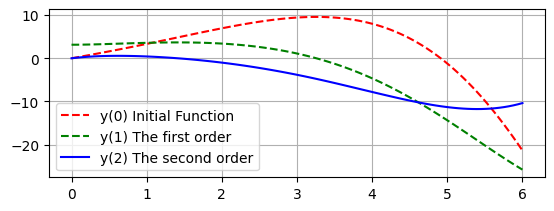

In [ ]:
t = np.linspace(0, 6, 100)
tspan = (0.0, 6.0)
y0 = [0.0, np.pi, 0.0]
y_ = spi.solve_ivp(f, t_span=tspan, y0=y0, t_eval=t)
print("y:\n", y_.y[0, :])
print("y':\n", y_.y[1, :])
print("y'':\n", y_.y[2, :])
plt.subplot(212)
l4, = plt.plot(y_.t, y_.y[0, :], 'r--', label='y(0) Initial Function')
l5, = plt.plot(y_.t, y_.y[1, :], 'g--', label='y(1) The first order')
l6, = plt.plot(y_.t, y_.y[2, :], 'b-', label='y(2) The second order')
plt.legend(handles=[l4, l5, l6])
plt.grid(True)
plt.show()

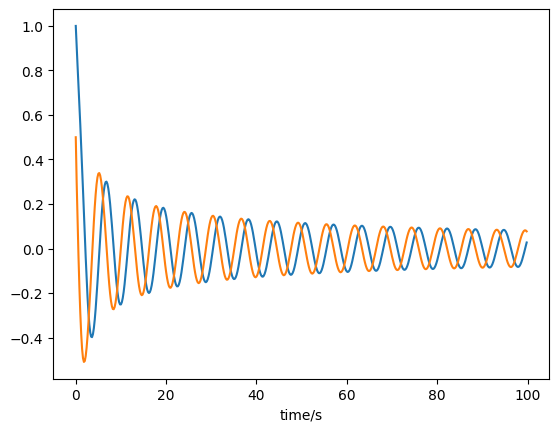

In [ ]:
def fun(t, w):
    y = w[0]
    x = w[1]
    return [-y**3+x, -x**3-y]


# 初始条件
y0 = [1, 0.5]
yy = spi.solve_ivp(fun, (0, 100), y0, method='RK45',
                   t_eval=np.arange(0, 100, 0.2))
t = yy.t
data = yy.y
plt.plot(t, data[0, :])
plt.plot(t, data[1, :])
plt.xlabel("time/s")
plt.show()

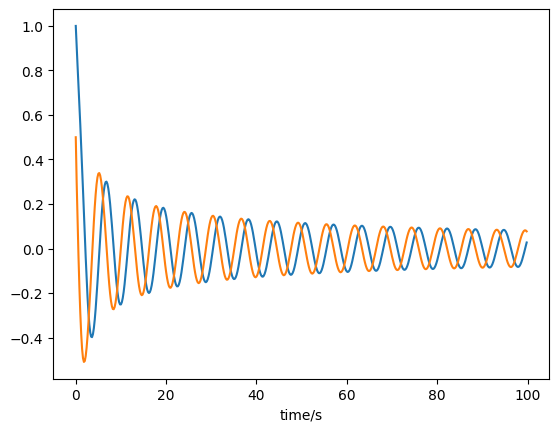

In [9]:
def fun2(t, w):
    x = w[0]
    y = w[1]
    return [-x**3-y, -y**3+x]


# 初始条件
y0 = [1, 0.5]
yy = spi.solve_ivp(fun, (0, 100), y0, method='RK45',
                   t_eval=np.arange(0, 100, 0.2))
t = yy.t
data = yy.y
plt.plot(t, data[0, :])
plt.plot(t, data[1, :])
plt.xlabel("time/s")
plt.show()

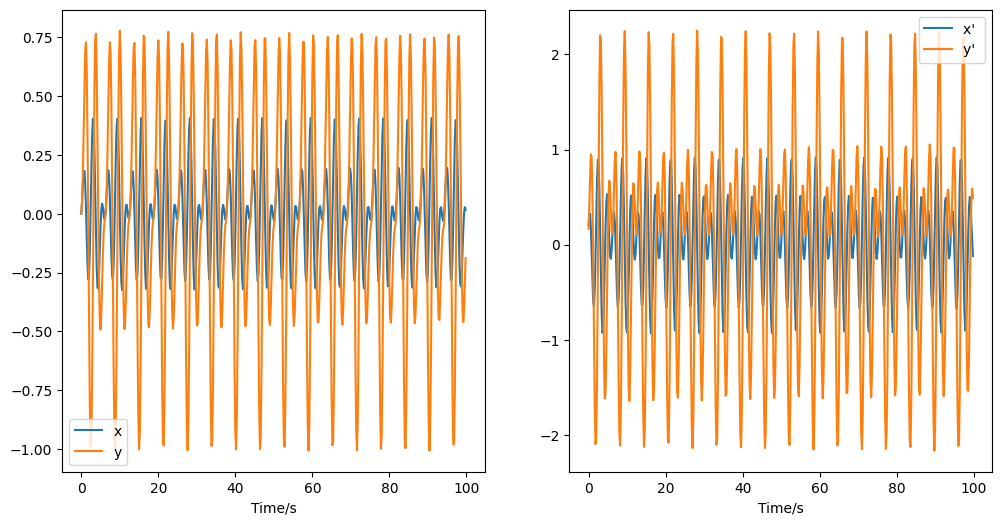

In [ ]:
def fun(t, w):
    x = w[0]
    y = w[1]
    dx = w[2]
    dy = w[3]
    # 求导以后[x,y,dx,dy]变为[dx,dy,d2x,d2y]
    # d2x为w[2]，d2y为w[5]
    return [dx, dy, -dy-3*x+np.cos(2*t), 4*dx-3*y+np.sin(2*t)]


# 初始条件
y0 = [0, 0, 1/5, 1/6]
yy = spi.solve_ivp(fun, (0, 100), y0, method='RK45',
                   t_eval=np.arange(0, 100, 0.2))
t = yy.t
data = yy.y
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(t, data[0, :])
plt.plot(t, data[1, :])
plt.legend(['x', 'y'])
plt.xlabel("Time/s")
plt.subplot(1, 2, 2)
plt.plot(t, data[2, :])
plt.plot(t, data[3, :])
plt.legend(["x' ", "y' "])
plt.xlabel("Time/s")
plt.show()

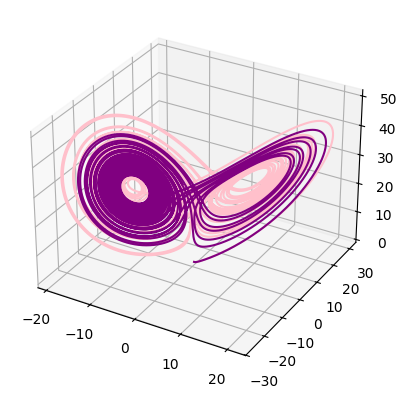

In [ ]:
def dmove(Point, t, sets):
    p, r, b = sets
    x, y, z = Point
    return np.array([p*(y-x), x*(r-z), x*y-b*z])


def dmove2(t, yy, sets):
    p, r, b = sets
    x, y, z = yy
    return [p*(y-x), x*(r-z)-y, x*y-b*z]


t = np.arange(0, 30, 0.001)
P1 = spi.odeint(dmove, (0., 1., 0.), t, args=([10., 28., 3.],))
P2 = spi.solve_ivp(dmove2, (0, 30), (0., 1.01, 0.),
                   t_eval=t, args=([10., 28., 3.],))
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot(P1[:, 0], P1[:, 1], P1[:, 2], color="pink")
ax.plot(P2.y[0], P2.y[1], P2.y[2], color="purple")
plt.show()

### 求概率分布

查看连续型和离散型随机变量的支持数量

In [ ]:
from scipy import stats
crv_list = [d for d in dir(stats) if isinstance(
    getattr(stats, d), stats.rv_continuous)]
drv_list = [d for d in dir(stats) if isinstance(
    getattr(stats, d), stats.rv_discrete)]
print(crv_list)
print(len(crv_list))
print(drv_list)
print(len(drv_list))

['alpha', 'anglit', 'arcsine', 'argus', 'beta', 'betaprime', 'bradford', 'burr', 'burr12', 'cauchy', 'chi', 'chi2', 'cosine', 'crystalball', 'dgamma', 'dweibull', 'erlang', 'expon', 'exponnorm', 'exponpow', 'exponweib', 'f', 'fatiguelife', 'fisk', 'foldcauchy', 'foldnorm', 'gamma', 'gausshyper', 'genexpon', 'genextreme', 'gengamma', 'genhalflogistic', 'genhyperbolic', 'geninvgauss', 'genlogistic', 'gennorm', 'genpareto', 'gibrat', 'gompertz', 'gumbel_l', 'gumbel_r', 'halfcauchy', 'halfgennorm', 'halflogistic', 'halfnorm', 'hypsecant', 'invgamma', 'invgauss', 'invweibull', 'jf_skew_t', 'johnsonsb', 'johnsonsu', 'kappa3', 'kappa4', 'ksone', 'kstwo', 'kstwobign', 'laplace', 'laplace_asymmetric', 'levy', 'levy_l', 'levy_stable', 'loggamma', 'logistic', 'loglaplace', 'lognorm', 'loguniform', 'lomax', 'maxwell', 'mielke', 'moyal', 'nakagami', 'ncf', 'nct', 'ncx2', 'norm', 'norminvgauss', 'pareto', 'pearson3', 'powerlaw', 'powerlognorm', 'powernorm', 'rayleigh', 'rdist', 'recipinvgauss', 'rec

求正态分布在某一点的概率密度

In [23]:
stats.norm.pdf(0, loc=0, scale=1)

In [24]:
stats.norm.cdf(0, loc=0, scale=1)

Compute a number of points

In [28]:
stats.norm.cdf([-1., 0, 1], loc=1, scale=1)

array([0.02275013, 0.15865525, 0.5       ])

Randomly sample from a normal distribution

In [29]:
stats.norm.rvs(loc=0, scale=1, size=10)

array([-1.57713354, -0.17897613,  0.924279  , -1.07766892,  0.88402598,
        0.31377231, -0.17877367, -1.17463247,  0.94128055,  0.65412833])

In [31]:
stats.uniform.stats(loc=0, scale=1, moments='mvsk')

In [35]:
stats.uniform.rvs(loc=0, scale=1, size=2)

array([0.75566504, 0.97606543])

In [42]:
stats.binom.stats(10, 0.5, moments='mvsk')
stats.binom.cdf(5, 10, 0.5)